Entrenando red NAND...
Iter 0, Error: 0.1935
Iter 2000, Error: 0.0885
Iter 4000, Error: 0.0037
Iter 6000, Error: 0.0014
Iter 8000, Error: 0.0008

Entrenando red XOR...
Iter 0, Error: 0.2603
Iter 2000, Error: 0.2493
Iter 4000, Error: 0.2436
Iter 6000, Error: 0.1739
Iter 8000, Error: 0.0152

Resultados NAND:
[0 0] -> 0.997
[0 1] -> 0.978
[1 0] -> 0.978
[1 1] -> 0.035

Resultados XOR:
[0 0] -> 0.055
[0 1] -> 0.933
[1 0] -> 0.940
[1 1] -> 0.068


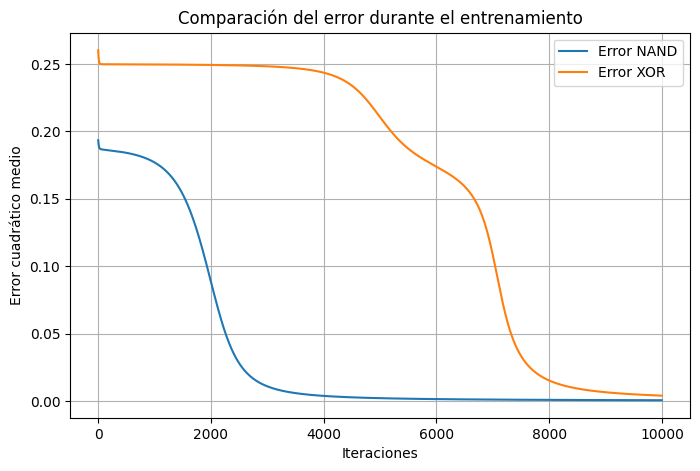

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Función de activación y su derivada
# ---------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# ---------------------------
# Clase Red Neuronal con 2 capas ocultas
# ---------------------------
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        # Inicialización de pesos y sesgos
        self.W1 = np.random.uniform(-1, 1, (input_size, hidden_size1))
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.uniform(-1, 1, (hidden_size1, hidden_size2))
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.uniform(-1, 1, (hidden_size2, output_size))
        self.b3 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = sigmoid(self.z3)
        return self.a3

    def backward(self, X, y, output, lr=0.1):
        # Error en capa de salida
        error = y - output
        d_output = error * sigmoid_derivative(output)

        # Error en capa oculta 2
        error_hidden2 = d_output.dot(self.W3.T)
        d_hidden2 = error_hidden2 * sigmoid_derivative(self.a2)

        # Error en capa oculta 1
        error_hidden1 = d_hidden2.dot(self.W2.T)
        d_hidden1 = error_hidden1 * sigmoid_derivative(self.a1)

        # Actualización de pesos y sesgos
        self.W3 += self.a2.T.dot(d_output) * lr
        self.b3 += np.sum(d_output, axis=0, keepdims=True) * lr

        self.W2 += self.a1.T.dot(d_hidden2) * lr
        self.b2 += np.sum(d_hidden2, axis=0, keepdims=True) * lr

        self.W1 += X.T.dot(d_hidden1) * lr
        self.b1 += np.sum(d_hidden1, axis=0, keepdims=True) * lr

        return np.mean(np.square(error))  # Error cuadrático medio

# ---------------------------
# Datos de entrenamiento
# ---------------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])

y_nand = np.array([[1],[1],[1],[0]])
y_xor  = np.array([[0],[1],[1],[0]])

# ---------------------------
# Entrenamiento NAND y XOR
# ---------------------------
def train_network(X, y, epochs=10000, lr=0.1):
    nn = NeuralNetwork(2, 4, 4, 1)
    errors = []
    for i in range(epochs):
        output = nn.forward(X)
        err = nn.backward(X, y, output, lr)
        errors.append(err)
        # Mostrar error cada 2000 iteraciones
        if i % 2000 == 0:
            print(f"Iter {i}, Error: {err:.4f}")
    return nn, errors

print("Entrenando red NAND...")
nn_nand, errors_nand = train_network(X, y_nand)

print("\nEntrenando red XOR...")
nn_xor, errors_xor = train_network(X, y_xor)

# ---------------------------
# Resultados finales
# ---------------------------
print("\nResultados NAND:")
for x in X:
    print(f"{x} -> {nn_nand.forward(np.array([x]))[0][0]:.3f}")

print("\nResultados XOR:")
for x in X:
    print(f"{x} -> {nn_xor.forward(np.array([x]))[0][0]:.3f}")

# ---------------------------
# Gráfica de errores
# ---------------------------
plt.figure(figsize=(8,5))
plt.plot(errors_nand, label="Error NAND")
plt.plot(errors_xor, label="Error XOR")
plt.xlabel("Iteraciones")
plt.ylabel("Error cuadrático medio")
plt.title("Comparación del error durante el entrenamiento")
plt.legend()
plt.grid(True)
plt.show()
